# Load the Dataset

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

data = np.genfromtxt('datasets/mHealth_subject1.log',delimiter='\t',usecols=range(0,23),filling_values=0)
classes = np.genfromtxt('datasets/mHealth_subject1.log',delimiter='\t',usecols=range(23,24),filling_values=0)

# for plotting
cmap2 = ListedColormap(['r', 'k'])
cmap4 = ListedColormap(['k', 'r', 'g', 'b'])
plt.rc("font",family="sans-serif",size=20)
plt.rcParams["font.sans-serif"] = "Arial"

Separate target and background datasets

In [5]:
target_idx_A = np.where(classes==8)[0] # jogging
target_idx_B = np.where(classes==9)[0] # squatting

labels = len(target_idx_A)*[0] + len(target_idx_B)*[1]
target_idx = np.concatenate((target_idx_A,target_idx_B))                                                                          

target = data[target_idx]

background_idx = np.where(classes==3)[0] # lying still
background = data[background_idx]

# Perform Contrastive PCA

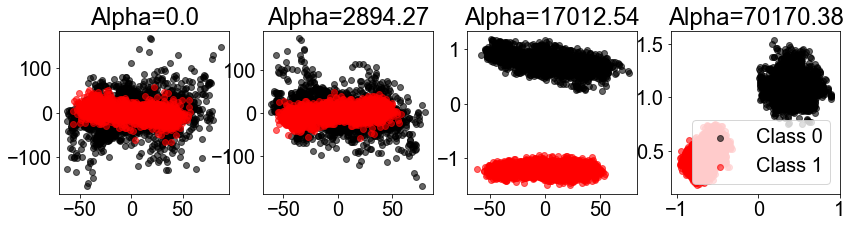

In [9]:
from contrastive import CPCA

mdl = CPCA(standardize=False)
mdl.fit_transform(target, background, max_log_alpha=5, plot=True, active_labels=labels)
projected_data = mdl.fit_transform(target, background, max_log_alpha=5, plot=False, active_labels=labels)

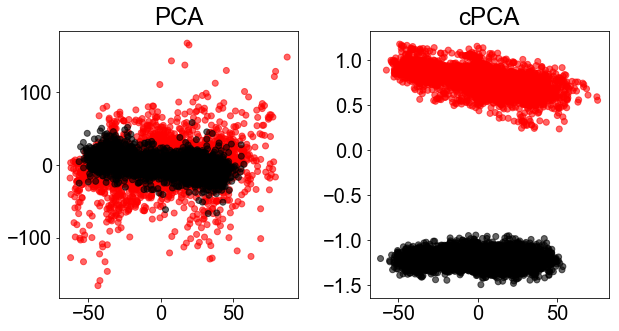

In [16]:
plt.figure(figsize=[9, 5])

plt.subplot(1,2,1)
plt.scatter(*projected_data[0].T, c=labels, cmap=cmap2, alpha=0.6)
plt.title('PCA')

plt.subplot(1,2,2)
plt.scatter(*projected_data[2].T, c=labels, cmap=cmap2, alpha=0.6)
plt.title('cPCA')

plt.tight_layout()
plt.savefig('IMU.jpg')